In [38]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [39]:
!pip install biopandas
from biopandas.mol2 import PandasMol2
import pandas as pd
import numpy as np

In [40]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [41]:
# Load molecular data
pmol = PandasMol2().read_mol2('/content/drive/My Drive/Molecular Simulation Data/flavanone/Copy of traj1_file.mol2')


# Display data
from IPython.display import display, HTML
#print ("All atoms in the data:")
display(HTML(pmol.df.to_html()))

#print('Molecule ID: %s' % pmol.code)
#print('\nRaw MOL2 file contents:\n\n%s\n...' % pmol.mol2_text[:1000])
#pmol.df.head(10)

Text(0.5, 0, 'atom type')

Text(0, 0.5, 'count')

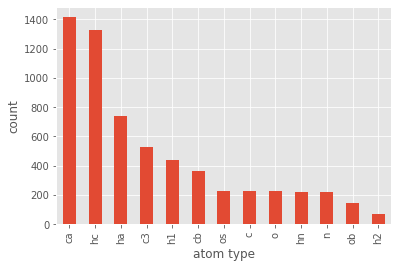

In [42]:
# Plot atoms count 
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
pmol.df['atom_type'].value_counts().plot(kind='bar')
plt.xlabel('atom type')
plt.ylabel('count')
plt.show()

In [43]:
# Calculate the atoms coordinates
#all_atoms_coord = pmol.df.loc[:,['x', 'y', 'z']].values

#from scipy.spatial import distance
# Calculate the distances between all atoms
#atoms_dist = distance.cdist(all_atoms_coord, all_atoms_coord, 'euclidean')
#all_atoms_dist = pd.DataFrame(data = atoms_dist, index = pmol.df['atom_name'], columns = pmol.df['atom_name'])
#display (all_atoms_dist)

In [44]:
# Separate corresponding atoms for H bond in flavanone drug

import pandas as pd
o_atom = pmol.df[pmol.df['atom_type'] == 'o']
os_atom = pmol.df[pmol.df['atom_type'] == 'os']
n_atom = pmol.df[pmol.df['atom_type'] == 'n']

hn_atom = pmol.df[pmol.df['atom_type'] == 'hn']

# Display all corresponding atoms in the data
all_hbond_atom = pd.concat ([o_atom, os_atom, n_atom, hn_atom],ignore_index= True, sort=False).sort_index()

#print ("All corresponding atoms in the data:")
#display(HTML(all_hbond_atom.to_html()))
#all_hbond_atom.loc[60:100,:]

In [45]:
# Delete and Rename columns
# Replace RFL and SFL to R-drug and S-drug respectively
required_hbond_atom = all_hbond_atom.drop(
    columns=['atom_id', 'x', 'y', 'z', 'charge']).rename(
        columns={"atom_name":"Atoms","atom_type":"Atom Type","subst_name":"Orientation","subst_id": "Molecule no"}).replace(
            to_replace=['RFL','SFL'], value=['R-drug','S-drug'], regex=True)
        

In [46]:
x=np.tile(np.repeat(range(1,19), 3),16)
monomer = []
i = 0
for substrate in all_hbond_atom['subst_name']:
  if substrate == 'CSP':
    monomer.append(x[i])
    i+=1
  else:
    monomer.append("")

In [47]:
donor = (all_hbond_atom['atom_type'] =='n') & (all_hbond_atom['subst_name'] =='CSP')
acceptor = ((all_hbond_atom['atom_type'] =='o')|(all_hbond_atom['atom_type'] =='os')) & ((all_hbond_atom['subst_name'] =='RFL')|(all_hbond_atom['subst_name'] =='SFL'))

required_hbond_atom['Monomer'], required_hbond_atom['Donor'],required_hbond_atom['Acceptor']= [monomer, donor*1, acceptor*1]
#required_hbond_atom.loc[437:455,:]
required_hbond_atom.style.set_properties(**{'text-align': 'center'}).set_table_styles([dict(selector='th', props=[('text-align', 'center')])])

In [48]:
# Calculate the atoms coordinates
all_atoms_coord = all_hbond_atom.loc[:,['x', 'y', 'z']].values

from scipy.spatial import distance
# Calculate the distances between all atoms
atoms_dist = distance.cdist(all_atoms_coord, all_atoms_coord, 'euclidean')
atoms_dist  = np.round(atoms_dist, 2)

In [49]:
all_atoms_dist = pd.DataFrame(data = atoms_dist, index=  all_hbond_atom.index , columns = all_hbond_atom['atom_name'].values)

display(HTML(all_atoms_dist.to_html()))

In [50]:
hbond_atom_distance = pd.concat([required_hbond_atom, all_atoms_dist] , axis=1)

#hbond_atom_distance.style.set_properties(**{'text-align': 'center'}).set_table_styles([dict(selector='th', props=[('text-align', 'center')])])
display(HTML(hbond_atom_distance.to_html()))